# SingletonBinning: Feature Demonstration

This notebook demonstrates the key features of the `SingletonBinning` class from the binlearn library.

## Key Features Covered:
- Basic singleton binning with discrete data
- Working with pandas DataFrames and numpy arrays
- Sklearn pipeline integration
- Parameter serialization and reconstruction
- Categorical data encoding

## Overview
`SingletonBinning` creates individual bins for each unique value in the data, making it ideal for:
- **Categorical data encoding**
- **Discrete numeric features**
- **Survey responses and rating scales**
- **Low-cardinality features**
- **Feature engineering while preserving data shape**

## 1. Setup and Data Preparation

In [15]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from binlearn.methods import SingletonBinning
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [16]:
# Create sample datasets emphasizing SingletonBinning strengths
n_samples = 200

# 1. Pandas DataFrame with categorical/discrete data
categorical_data = pd.DataFrame({
    'product_rating': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.05, 0.1, 0.2, 0.35, 0.3]),
    'satisfaction': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.08, 0.12, 0.25, 0.35, 0.2]),
    'usage_frequency': np.random.choice([1, 2, 3, 4], n_samples, p=[0.3, 0.4, 0.2, 0.1])
})

# 2. Encoded categorical data
product_categories = ['Electronics', 'Clothing', 'Books', 'Home']
le = LabelEncoder()
categorical_data['product_type'] = le.fit_transform(
    np.random.choice(product_categories, n_samples)
)

# 3. NumPy array with discrete values
discrete_array = np.random.choice([0, 1, 2, 3], size=(n_samples, 2))

# 4. Iris dataset (for demonstration)
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(f"📊 Created datasets:")
print(f"   - Categorical data: {categorical_data.shape}")
print(f"   - Discrete array: {discrete_array.shape}")
print(f"   - Iris data: {iris_df.shape}")
print("\n📈 Categorical data preview:")
print(categorical_data.head())
print("\n📊 Unique values per column:")
for col in categorical_data.columns:
    unique_vals = sorted(categorical_data[col].unique())
    print(f"   {col}: {len(unique_vals)} unique values {unique_vals}")

📊 Created datasets:
   - Categorical data: (200, 4)
   - Discrete array: (200, 2)
   - Iris data: (150, 4)

📈 Categorical data preview:
   product_rating  satisfaction  usage_frequency  product_type
0               4             4                1             2
1               5             2                4             1
2               5             2                2             3
3               4             5                3             1
4               3             4                2             2

📊 Unique values per column:
   product_rating: 5 unique values [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   satisfaction: 5 unique values [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   usage_frequency: 4 unique values [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
   product_type: 4 unique values [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


## 2. Basic Binning Operations

In [17]:
# Basic usage with categorical data
print("🎯 Basic SingletonBinning Demonstration")
print("=" * 45)

# Create and fit binner
binner = SingletonBinning(preserve_dataframe=True)
binned_data = binner.fit_transform(categorical_data)

print(f"\n📊 Original vs Binned Data:")
print("Original data types:")
print(categorical_data.dtypes)
print("\nBinned data types:")
print(binned_data.dtypes)

print(f"\n🔢 Binning specifications created:")
for col_id, specs in binner.bin_spec_.items():
    col_name = col_id if isinstance(col_id, str) else f"Column {col_id}"
    print(f"   {col_name}: {len(specs)} singleton bins for values {specs}")

print(f"\n📋 Bin representatives:")
for col_id, reps in binner.bin_representatives_.items():
    col_name = col_id if isinstance(col_id, str) else f"Column {col_id}"
    print(f"   {col_name}: {reps}")

# Show data transformation
print(f"\n🔄 Data transformation example:")
print("Original (first 10 rows):")
print(categorical_data.head(10))
print("\nBinned (first 10 rows):")
print(binned_data.head(10))

🎯 Basic SingletonBinning Demonstration

📊 Original vs Binned Data:
Original data types:
product_rating     int64
satisfaction       int64
usage_frequency    int64
product_type       int64
dtype: object

Binned data types:
product_rating     int64
satisfaction       int64
usage_frequency    int64
product_type       int64
dtype: object

🔢 Binning specifications created:
   product_rating: 5 singleton bins for values [1, 2, 3, 4, 5]
   satisfaction: 5 singleton bins for values [1, 2, 3, 4, 5]
   usage_frequency: 4 singleton bins for values [1, 2, 3, 4]
   product_type: 4 singleton bins for values [0, 1, 2, 3]

📋 Bin representatives:
   product_rating: [1, 2, 3, 4, 5]
   satisfaction: [1, 2, 3, 4, 5]
   usage_frequency: [1, 2, 3, 4]
   product_type: [0, 1, 2, 3]

🔄 Data transformation example:
Original (first 10 rows):
   product_rating  satisfaction  usage_frequency  product_type
0               4             4                1             2
1               5             2                

In [18]:
# Demonstrate parameter constraints
print("\n⚠️  Parameter Constraints Demonstration")
print("=" * 45)

try:
    # This should work fine
    binner_limited = SingletonBinning(preserve_dataframe=True)
    result = binner_limited.fit_transform(categorical_data)
    print("✅ Successfully applied with max_unique_values=10")
    
    # This might fail with continuous data
    continuous_data = pd.DataFrame({
        'continuous_feat': np.random.randn(100)  # Many unique values
    })
    
    try:
        binner_strict = SingletonBinning()
        binner_strict.fit_transform(continuous_data)
        print("✅ Continuous data accepted")
    except ValueError as e:
        print(f"❌ Expected error with continuous data: {str(e)[:80]}...")
        
except Exception as e:
    print(f"❌ Unexpected error: {e}")

# Show appropriate use cases
print(f"\n✅ Best suited for:")
print("   • Categorical features (after encoding)")
print("   • Rating scales (1-5, 1-10)")
print("   • Survey responses")
print("   • Discrete numeric codes")
print("   • Low-cardinality features")


⚠️  Parameter Constraints Demonstration
✅ Successfully applied with max_unique_values=10
✅ Continuous data accepted

✅ Best suited for:
   • Categorical features (after encoding)
   • Rating scales (1-5, 1-10)
   • Survey responses
   • Discrete numeric codes
   • Low-cardinality features


## 3. Visualization and Analysis

📊 Creating visualization of binning effects...


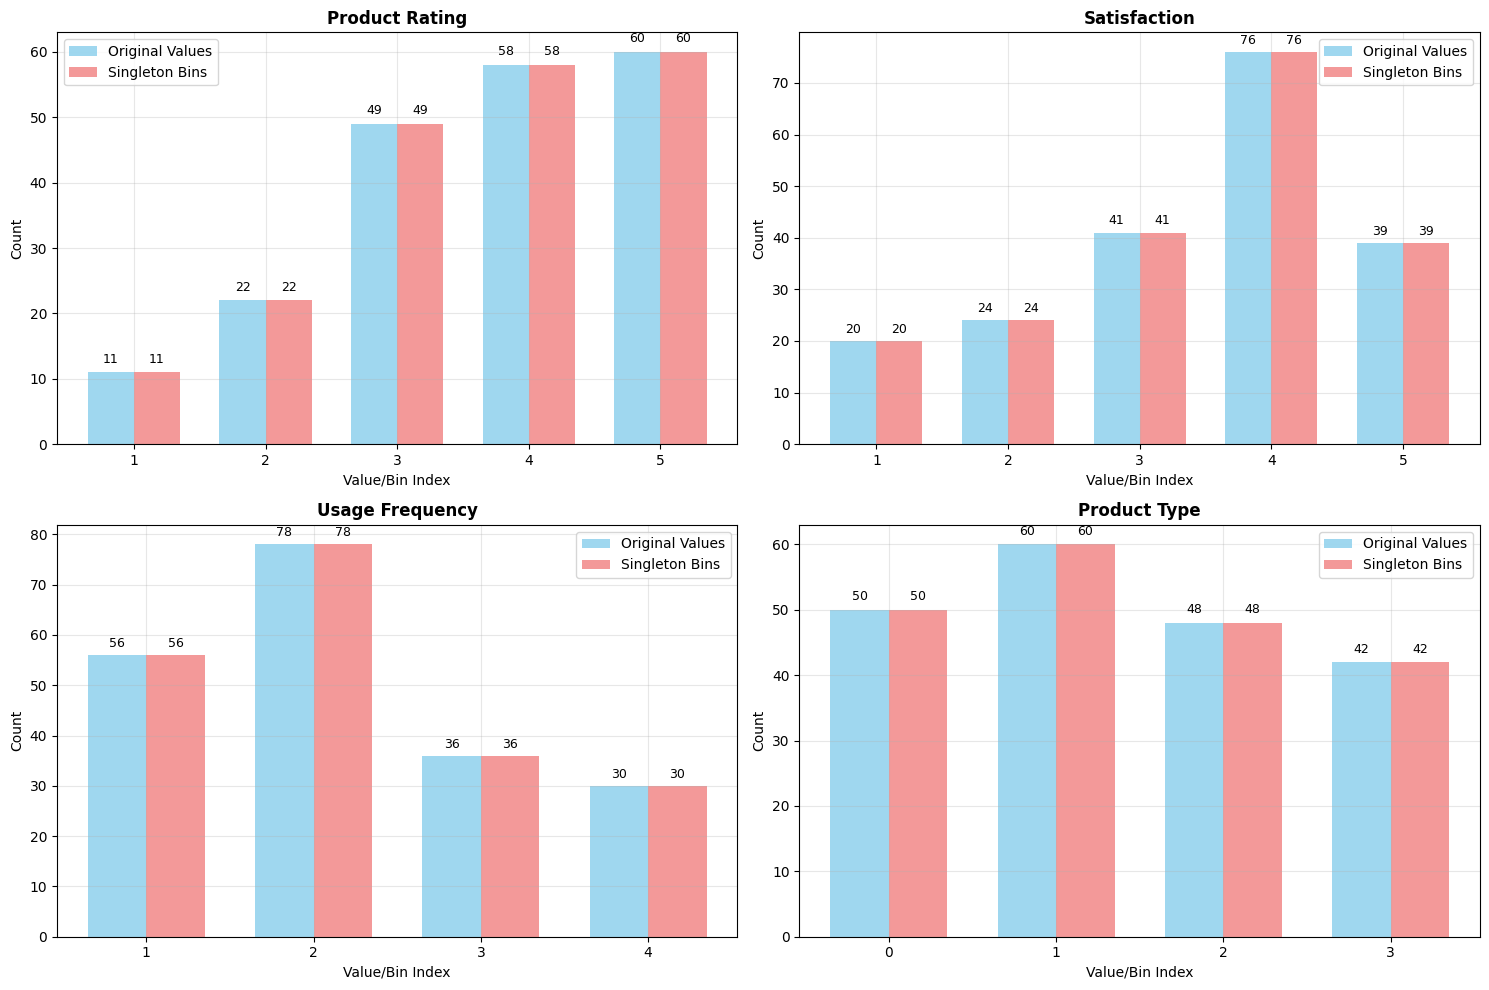


🔍 Data preservation verification:
Correlations should be identical:

Original correlations:
                 product_rating  satisfaction  usage_frequency  product_type
product_rating            1.000         0.020           -0.033         0.064
satisfaction              0.020         1.000           -0.147         0.016
usage_frequency          -0.033        -0.147            1.000         0.113
product_type              0.064         0.016            0.113         1.000

Binned correlations:
                 product_rating  satisfaction  usage_frequency  product_type
product_rating            1.000         0.020           -0.033         0.064
satisfaction              0.020         1.000           -0.147         0.016
usage_frequency          -0.033        -0.147            1.000         0.113
product_type              0.064         0.016            0.113         1.000

✅ Correlation preservation: True


In [19]:
# Create visualization
print("📊 Creating visualization of binning effects...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_data.columns):
    if i >= 4:
        break
        
    ax = axes[i]
    
    # Original data distribution
    original_counts = categorical_data[col].value_counts().sort_index()
    binned_counts = binned_data[col].value_counts().sort_index()
    
    x_pos = np.arange(len(original_counts))
    width = 0.35
    
    bars1 = ax.bar(x_pos - width/2, original_counts.values, width, 
                   label='Original Values', alpha=0.8, color='skyblue')
    bars2 = ax.bar(x_pos + width/2, binned_counts.values, width,
                   label='Singleton Bins', alpha=0.8, color='lightcoral')
    
    ax.set_title(f'{col.replace("_", " ").title()}', fontweight='bold')
    ax.set_xlabel('Value/Bin Index')
    ax.set_ylabel('Count')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(original_counts.index)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Verify data preservation
print(f"\n🔍 Data preservation verification:")
print("Correlations should be identical:")
print("\nOriginal correlations:")
print(categorical_data.corr().round(3))
print("\nBinned correlations:")
print(binned_data.corr().round(3))
print("\n✅ Correlation preservation:", 
      np.allclose(categorical_data.corr().values, binned_data.corr().values, equal_nan=True))

## 4. Sklearn Pipeline Integration

In [20]:
# Create a classification dataset with discrete features
print("🔧 Sklearn Pipeline Integration")
print("=" * 35)

# Create discrete features for classification
n_samples = 500
discrete_features = pd.DataFrame({
    'category_a': np.random.choice([1, 2, 3, 4], n_samples),
    'category_b': np.random.choice([0, 1, 2], n_samples),
    'rating': np.random.choice([1, 2, 3, 4, 5], n_samples)
})

# Create target based on features
target = (
    (discrete_features['category_a'] >= 3).astype(int) +
    (discrete_features['category_b'] == 2).astype(int) +
    (discrete_features['rating'] >= 4).astype(int)
) >= 2

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    discrete_features, target, test_size=0.3, random_state=42, stratify=target
)

print(f"📊 Dataset info:")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Target distribution: {np.bincount(target)}")

# Create pipelines for comparison
pipeline_with_binning = Pipeline([
    ('singleton_binning', SingletonBinning(preserve_dataframe=True)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

pipeline_without_binning = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

# Fit and evaluate
print(f"\n🎯 Training and evaluation:")
pipeline_with_binning.fit(X_train, y_train)
pipeline_without_binning.fit(X_train, y_train)

# Predictions
y_pred_binned = pipeline_with_binning.predict(X_test)
y_pred_original = pipeline_without_binning.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_binned = accuracy_score(y_test, y_pred_binned)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"   Accuracy with SingletonBinning:  {accuracy_binned:.4f}")
print(f"   Accuracy without binning:        {accuracy_original:.4f}")
print(f"   Difference:                      {accuracy_binned - accuracy_original:+.4f}")

# Show binning results
singleton_binner = pipeline_with_binning.named_steps['singleton_binning']
print(f"\n📋 Binning applied in pipeline:")
for col_id, specs in singleton_binner.bin_spec_.items():
    col_name = col_id if isinstance(col_id, str) else f"Column {col_id}"
    print(f"   {col_name}: {len(specs)} singleton bins for {specs}")

🔧 Sklearn Pipeline Integration
📊 Dataset info:
   Training samples: 350
   Test samples: 150
   Features: 3
   Target distribution: [306 194]

🎯 Training and evaluation:
   Accuracy with SingletonBinning:  1.0000
   Accuracy without binning:        1.0000
   Difference:                      +0.0000

📋 Binning applied in pipeline:
   category_a: 4 singleton bins for [1, 2, 3, 4]
   category_b: 3 singleton bins for [0, 1, 2]
   rating: 5 singleton bins for [1, 2, 3, 4, 5]


## 5. Array Operations and Serialization

In [21]:
# Working with numpy arrays
print("🔢 NumPy Array Operations")
print("=" * 30)

# Apply to numpy array
array_binner = SingletonBinning()
binned_array = array_binner.fit_transform(discrete_array)

print(f"📊 Array binning:")
print(f"   Original shape: {discrete_array.shape}")
print(f"   Binned shape: {binned_array.shape}")
print(f"   Original unique values per column: {[len(np.unique(discrete_array[:, i])) for i in range(discrete_array.shape[1])]}")
print(f"   Binned unique values per column: {[len(np.unique(binned_array[:, i])) for i in range(binned_array.shape[1])]}")

print(f"\n🔍 Array comparison (first 10 rows):")
print("Original:")
print(discrete_array[:10])
print("Binned:")
print(binned_array[:10])

# Parameter extraction and reconstruction
print(f"\n💾 Parameter Serialization")
print("=" * 30)

# Extract parameters
params = array_binner.get_params()
print(f"📋 Extracted parameters:")
for key, value in params.items():
    print(f"   {key}: {value}")

# Reconstruct binner
new_binner = SingletonBinning(**params)

# Test reconstruction
test_array = np.array([[0, 1], [2, 3], [1, 0]])
original_result = array_binner.transform(test_array)
reconstructed_result = new_binner.transform(test_array)

print(f"\n✅ Reconstruction verification:")
print(f"   Original result: {original_result.tolist()}")
print(f"   Reconstructed result: {reconstructed_result.tolist()}")
print(f"   Results match: {np.array_equal(original_result, reconstructed_result)}")

🔢 NumPy Array Operations
📊 Array binning:
   Original shape: (200, 2)
   Binned shape: (200, 2)
   Original unique values per column: [4, 4]
   Binned unique values per column: [4, 4]

🔍 Array comparison (first 10 rows):
Original:
[[2 2]
 [0 1]
 [1 3]
 [1 0]
 [2 1]
 [3 1]
 [0 3]
 [1 3]
 [0 2]
 [0 0]]
Binned:
[[2 2]
 [0 1]
 [1 3]
 [1 0]
 [2 1]
 [3 1]
 [0 3]
 [1 3]
 [0 2]
 [0 0]]

💾 Parameter Serialization
📋 Extracted parameters:
   preserve_dataframe: False
   fit_jointly: False
   bin_spec: {0: [0, 1, 2, 3], 1: [0, 1, 2, 3]}
   bin_representatives: {0: [0, 1, 2, 3], 1: [0, 1, 2, 3]}
   class_: SingletonBinning
   module_: binlearn.methods._singleton_binning

✅ Reconstruction verification:
   Original result: [[0, 1], [2, 3], [1, 0]]
   Reconstructed result: [[0, 1], [2, 3], [1, 0]]
   Results match: True


## 6. Real-World Example: Survey Data Analysis

📋 Survey Data Analysis Example
📊 Survey dataset:
   Respondents: 300
   Features: 4

📈 Response distributions:
   age_group: {1: np.int64(45), 2: np.int64(68), 3: np.int64(96), 4: np.int64(65), 5: np.int64(26)}
   satisfaction: {1: np.int64(13), 2: np.int64(39), 3: np.int64(48), 4: np.int64(126), 5: np.int64(74)}
   frequency: {1: np.int64(62), 2: np.int64(96), 3: np.int64(97), 4: np.int64(45)}
   recommend: {0: np.int64(49), 1: np.int64(251)}

🎯 SingletonBinning results:
   age_group: 5 bins created for values [1, 2, 3, 4, 5]
   satisfaction: 5 bins created for values [1, 2, 3, 4, 5]
   frequency: 4 bins created for values [1, 2, 3, 4]
   recommend: 2 bins created for values [0, 1]

🔍 Analysis insights:
   • Each unique response value gets its own bin
   • Perfect preservation of discrete categories
   • Ideal for maintaining interpretability
   • No loss of information in the transformation


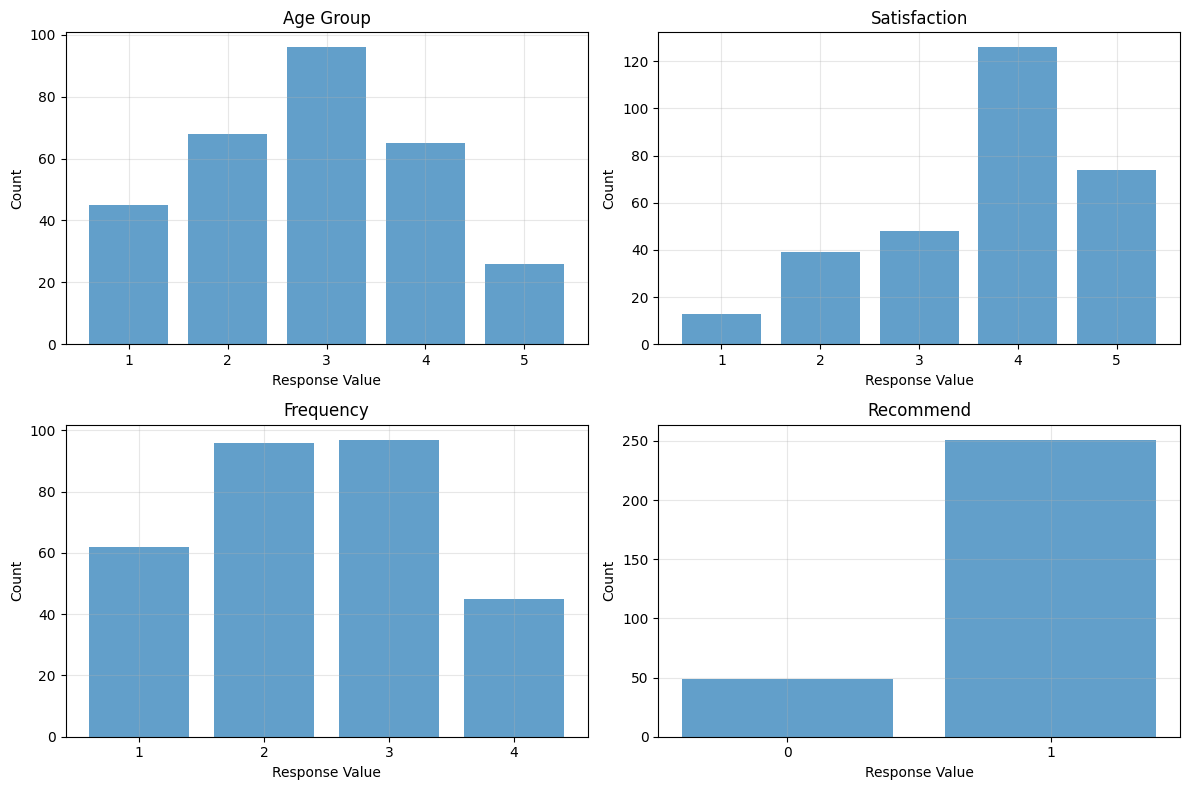


✅ SingletonBinning successfully applied to survey data!
   Perfect for categorical analysis and machine learning preprocessing.


In [22]:
# Real-world survey data example
print("📋 Survey Data Analysis Example")
print("=" * 35)

# Create realistic survey data
n_respondents = 300
survey_data = pd.DataFrame({
    'age_group': np.random.choice([1, 2, 3, 4, 5], n_respondents, 
                                 p=[0.15, 0.25, 0.3, 0.2, 0.1]),  # Age groups
    'satisfaction': np.random.choice([1, 2, 3, 4, 5], n_respondents,
                                   p=[0.05, 0.1, 0.2, 0.4, 0.25]),  # Satisfaction scale
    'frequency': np.random.choice([1, 2, 3, 4], n_respondents,
                                p=[0.2, 0.3, 0.35, 0.15]),  # Usage frequency
    'recommend': np.random.choice([0, 1], n_respondents, p=[0.3, 0.7])  # Binary recommendation
})

# Apply realistic correlations
high_satisfaction = survey_data['satisfaction'] >= 4
survey_data.loc[high_satisfaction, 'recommend'] = np.random.choice(
    [0, 1], high_satisfaction.sum(), p=[0.1, 0.9]
)

print(f"📊 Survey dataset:")
print(f"   Respondents: {len(survey_data)}")
print(f"   Features: {survey_data.shape[1]}")

print(f"\n📈 Response distributions:")
for col in survey_data.columns:
    counts = survey_data[col].value_counts().sort_index()
    print(f"   {col}: {dict(counts)}")

# Apply SingletonBinning
survey_binner = SingletonBinning(preserve_dataframe=True)
survey_binned = survey_binner.fit_transform(survey_data)

print(f"\n🎯 SingletonBinning results:")
for col_id, specs in survey_binner.bin_spec_.items():
    col_name = col_id if isinstance(col_id, str) else f"Column {col_id}"
    print(f"   {col_name}: {len(specs)} bins created for values {specs}")

# Analysis insights
print(f"\n🔍 Analysis insights:")
print(f"   • Each unique response value gets its own bin")
print(f"   • Perfect preservation of discrete categories")
print(f"   • Ideal for maintaining interpretability")
print(f"   • No loss of information in the transformation")

# Create simple visualization
plt.figure(figsize=(12, 8))
for i, col in enumerate(survey_data.columns, 1):
    plt.subplot(2, 2, i)
    counts = survey_data[col].value_counts().sort_index()
    plt.bar(range(len(counts)), counts.values, alpha=0.7)
    plt.title(f'{col.replace("_", " ").title()}')
    plt.xlabel('Response Value')
    plt.ylabel('Count')
    plt.xticks(range(len(counts)), counts.index)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ SingletonBinning successfully applied to survey data!")
print(f"   Perfect for categorical analysis and machine learning preprocessing.")

## 7. Summary and Best Practices

### Key Takeaways:
- **Perfect for discrete/categorical data**: SingletonBinning creates exactly one bin per unique value
- **Preserves data relationships**: Correlations and distributions remain identical
- **Sklearn compatible**: Seamlessly integrates into machine learning pipelines
- **Memory efficient**: Only stores unique values, not full data transformations
- **Interpretable**: Maintains clear mapping between original and binned values

### Best Practices:
1. **Use for low-cardinality data** (< 50 unique values per feature)
2. **Encode string categories first** using LabelEncoder or similar
3. **Set max_unique_values** to prevent memory issues with high-cardinality data
4. **Verify data preservation** by checking correlations before/after
5. **Combine with other preprocessing** in sklearn Pipelines for complete workflows

### When to Use SingletonBinning:
- ✅ Categorical features with numeric encoding
- ✅ Survey responses and rating scales  
- ✅ Discrete codes and identifiers
- ✅ Feature engineering for tree-based models
- ❌ Continuous variables with many unique values
- ❌ When you need fewer bins than unique values